In [1]:
from stable_baselines3 import PPO
from PipeEnv import PipeHeaterSafeEnvGymnasium
from stable_baselines3 import PPO, SAC
from params import *

params["dt"] = 10.0
env = PipeHeaterSafeEnvGymnasium(params, Tinlet=15, Tset=85, T_ext=20, dt=1.0, t_final=3600)


In [ ]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000_000)  # adjust for convergence

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 6596 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.6e+03     |
|    ep_rew_mean          | -2.45e+05   |
| time/                   |             |
|    fps                  | 4149        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.002207073 |
|    clip_fraction        | 0.00435     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 5.13e-05    |
|    learning_rate        | 0.0003      |
|    loss               

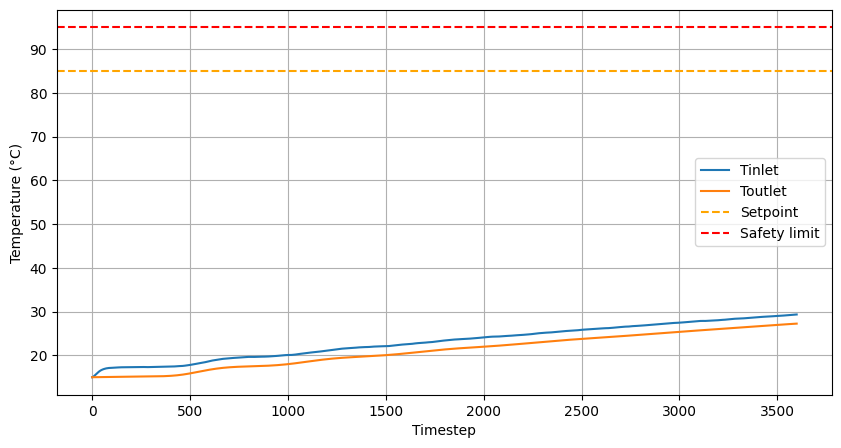

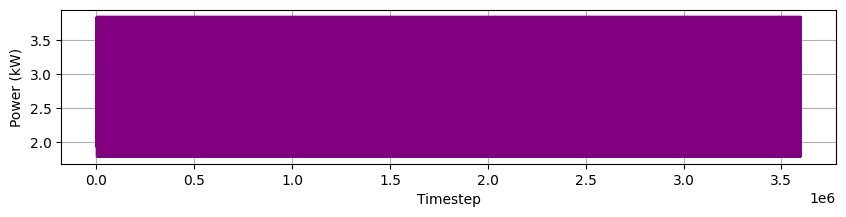

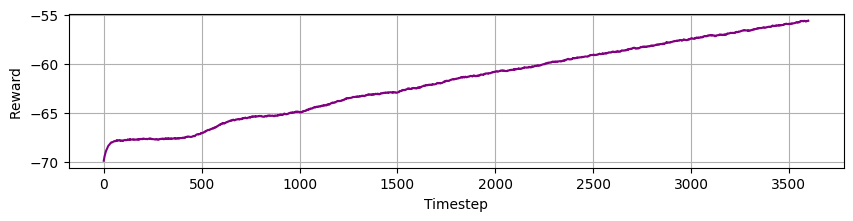

In [4]:
obs, _ = env.reset()
Tin_hist, Tout_hist, P_hist, R_list = [], [], [], []

for _ in range(env.steps):
    action, _ = model.predict(obs)
    # action = [30]
    obs, reward, terminated, truncated, _ = env.step(action)
    Tin_hist.append(obs[0])
    Tout_hist.append(obs[-1])
    P_hist.append(action[0])
    R_list.append(reward)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(Tin_hist, label="Tinlet")
plt.plot(Tout_hist, label="Toutlet")
plt.axhline(env.Tset, color="orange", linestyle="--", label="Setpoint")
plt.axhline(95, color="red", linestyle="--", label="Safety limit")
plt.ylabel("Temperature (°C)")
plt.xlabel("Timestep")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,2))
plt.plot(P_hist*1000, color="purple", label="Heater Power (kW)")
plt.ylabel("Power (kW)")
plt.xlabel("Timestep")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,2))
plt.plot(R_list, color="purple", label="Reward")
plt.ylabel("Reward ")
plt.xlabel("Timestep")
plt.grid(True)
plt.show()


